In [2]:
## Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


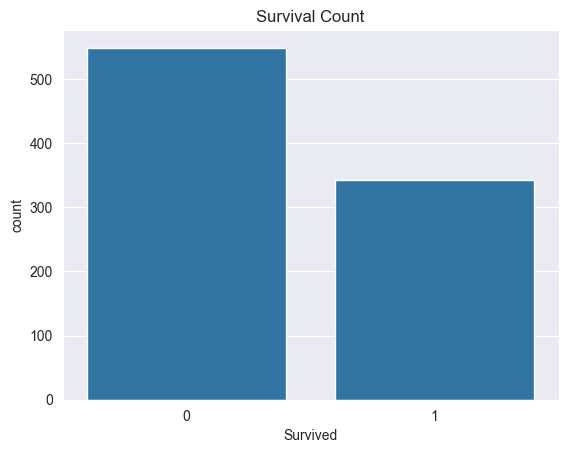

In [4]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

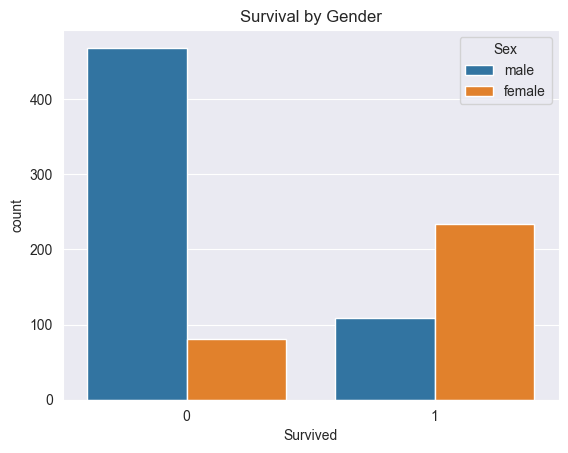

In [5]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Gender')
plt.show()

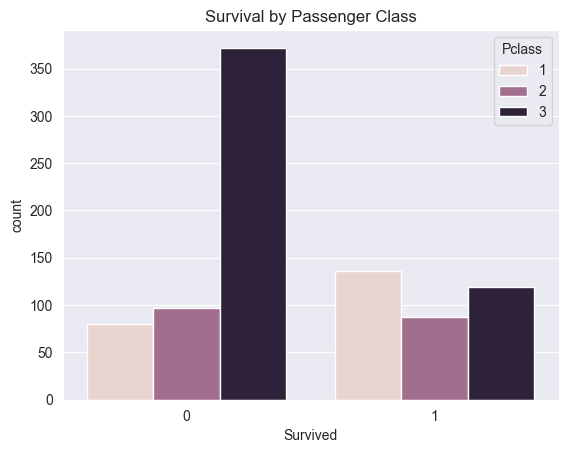

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Passenger Class')
plt.show()

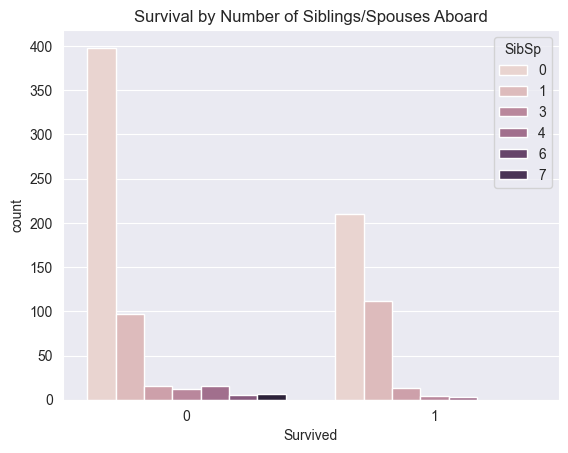

In [19]:
sns.countplot(x='Survived', hue='SibSp', data=train_data)
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.show()


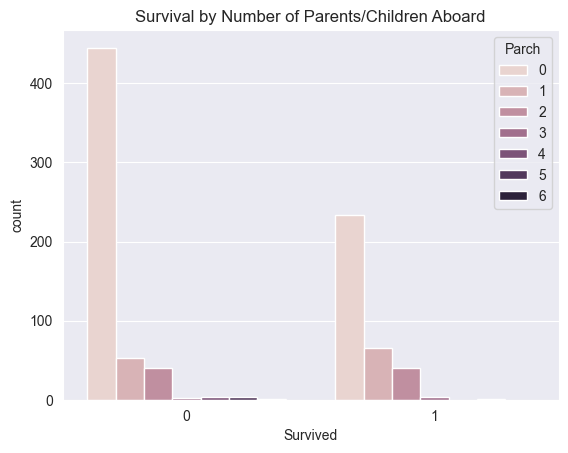

In [20]:
sns.countplot(x='Survived', hue='Parch', data=train_data)
plt.title('Survival by Number of Parents/Children Aboard')
plt.show()

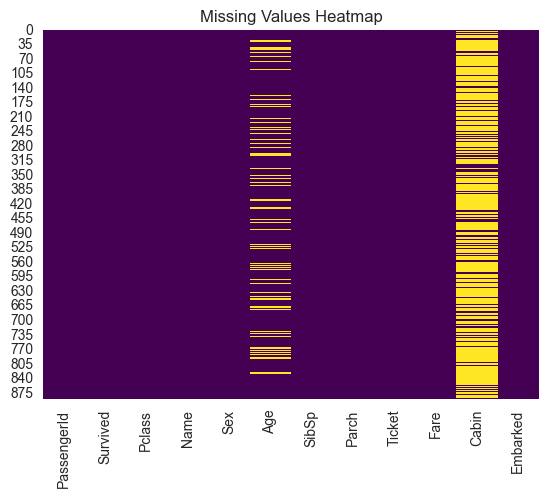

In [8]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [21]:
def preprocess_data(data, is_train=True):
    # Drop irrelevant columns
    data = data.drop(['Name'], axis=1, errors='ignore')

    # Fill missing numerical data with the median
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        data[col] = data[col].fillna(data[col].median())

    # Fill missing categorical data with the mode
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = data[col].fillna(data[col].mode()[0])

    # Handle categorical columns specifically for Ticket and Cabin (frequency encoding)
    if 'Ticket' in data.columns:
        data['Ticket'] = data['Ticket'].map(data['Ticket'].value_counts())
    if 'Cabin' in data.columns:
        data['Cabin'] = data['Cabin'].fillna('Missing')
        data['Cabin'] = data['Cabin'].str[0]
        data = pd.get_dummies(data, columns=['Cabin'], drop_first=True)

    # Convert other categorical data into numerical using one-hot encoding
    data = pd.get_dummies(data, drop_first=True)

    # Separate features and target for training data
    if is_train:
        X = data.drop('Survived', axis=1, errors='ignore')
        y = data['Survived']
        return X, y
    else:
        return data


In [22]:
X, y = preprocess_data(train_data, is_train=True)
X_test = preprocess_data(test_data, is_train=False)

In [23]:
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [26]:
y_pred = rf_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

Validation Accuracy: 0.82


In [27]:
test_predictions = rf_model.predict(X_test)

In [28]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file 'titanic_submission.csv' has been created.")

Submission file 'titanic_submission.csv' has been created.
